In [19]:
import pandas as pd
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})
plt.rc('legend', fontsize=12) 

import random
from scipy.special import rel_entr

from attack_funcs import *
from dp_block_funcs import *

In [20]:
my_color_vec = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

In [21]:
################## DATA FRAME ##################
datafile = 'Data/Fitbit_Kaggle/dailyActivity_merged.csv'
all_fields = ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 
          'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 
          'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

#pd.set_option('display.max_rows', 100)
df = pd.read_csv(datafile, skipinitialspace=True, usecols=all_fields)
fields = 'FairlyActiveMinutes'
selected_data = df[['Id',fields]]
n_rows, n_cols = df.shape

selected_data.head()

,Id,FairlyActiveMinutes
0,1503960366,13
1,1503960366,19
2,1503960366,11
3,1503960366,34
4,1503960366,10


## No Privacy Mechanism (Anonymous)

In [22]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [23]:
res_df = run_n_attacks(df, df, 8, sample_size=2)

SANITY CHECK:
4702921684 in training_IDs: False
8583815059 in training_IDs: False
8792009665 in training_IDs: True
4388161847 in training_IDs: True
TEST IDs:

[4702921684, 8583815059]
TEST VALS 1
[  0   0   0   8  24  66  30   8  29  41   0  66  95  15   8  16   9  19
  36   0  40   0  15   5  16  46 125  12  37  41   0]

TEST VALS 2
[ 7 23  0  0  0  0 22 10 27 18 54 44 44  6 91  5 28 67 28  2  0  0  0  0
 22  0 72  4 43 71  0]

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=5, k=1: Correct nu

C:\Users\kdmen\Desktop\Spring2022\BMIF_7380\BMIF_Project\attack_funcs.py:92: RuntimeWarning: invalid value encountered in double_scalars
  precision = true_positives[j, k_idx] / (true_positives[j, k_idx] + false_positives)


Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Correct number of positives found (2)!
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Correct number of positives found (2)!
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Correct number of positives found (2)!
Th=5, k=20: Correct number of positives found (2)!
Th=5, k=30: Correct number of positives found (2)!
--------------------------------------------
END OF ATTACK NUMBER 3
--------------------------------------------

SANITY CHECK:
8583815059 in training_IDs: False
8053475328 in training_IDs: False
4445114986 in training_IDs: True
4319703577 i

In [24]:
res_df.fillna(0)
width = 0.8
num_trials = 8
my_xs = [1,5,10,20,30]
ths = [0,2,5]
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_df.loc[res_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

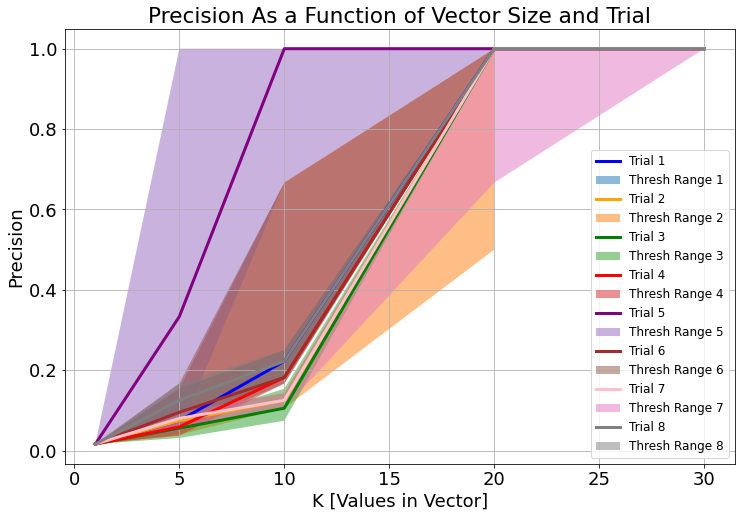

<Figure size 864x576 with 0 Axes>

In [25]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][0], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0], alpha=0.5)

ax.set_title('Precision As a Function of Vector Size and Trial')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower right')
ax.grid(visible=True, which='both')

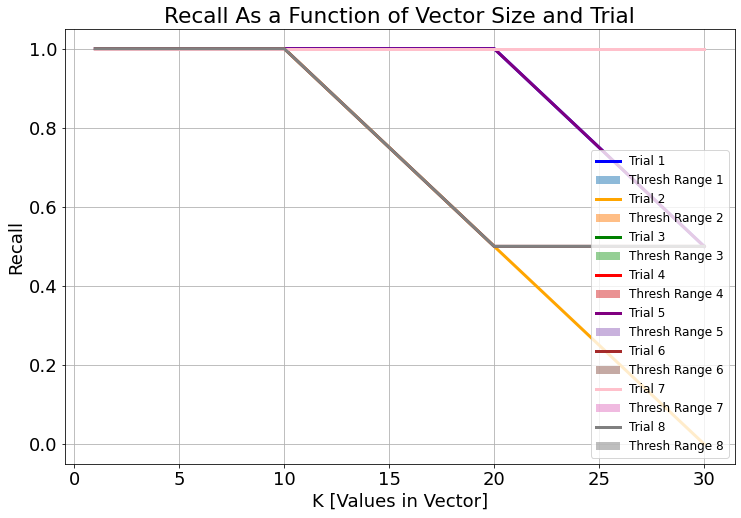

<Figure size 864x576 with 0 Axes>

In [26]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1], alpha=0.5)

ax.set_title('Recall As a Function of Vector Size and Trial')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower right')
ax.grid(visible=True, which='both')

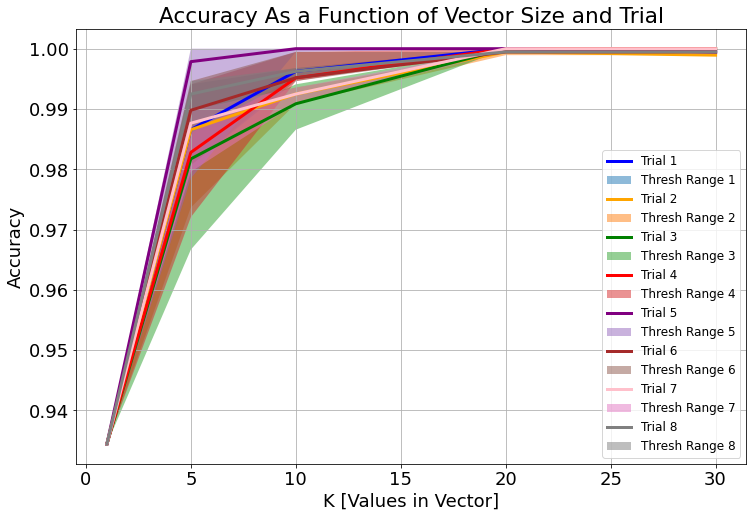

<Figure size 864x576 with 0 Axes>

In [27]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2], alpha=0.5)

ax.set_title('Accuracy As a Function of Vector Size and Trial')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower right')
ax.grid(visible=True, which='both')

## Differential Privacy Set Up

In [10]:
values = list(selected_data['FairlyActiveMinutes'].unique())
privmax = reportNoisyMax(values, 1.0)
print(int(privmax))

148


In [14]:
#Divide the rande [0,150] into buckets of 10
blocks = list()
block = list()
for i in range(0, math.ceil(privmax)):
    block.append(i)
    if len(block)>=10:
        blocks.append(block)
        block = list()
        
IDs = selected_data['Id'].unique()
individualAct = dict()
selectedIDs = IDs
for Id in selectedIDs:
    act = selected_data[selected_data['Id']==Id]
    individualAct[Id] = act['FairlyActiveMinutes'].tolist()

In [15]:
ep_list = [0.01, 0.1, 1.0, 2.0, 5.0, 10.0]
LEP = len(ep_list)

#for i, epsilon in enumerate(ep_list):

pB=0.85
#pB = calc_pB_block(epsilon, blocks)
#pB = calc_pB_individual(epsilon, blocks, values)

#Sanitize without memoization
sanProfiles = sanitizeActProfile(IDs,individualAct,pB,blocks)
#Sanitize with memoization
sanProfilesM = sanitizeActProfile(IDs,individualAct,pB,blocks,True)

## BlockRR, No Memoization

In [16]:
P_df = pd.DataFrame()

for key in sanProfiles.keys():
    for val in sanProfiles[key]:
        P_df = P_df.append(pd.Series([key, val]), ignore_index=True)
P_df.columns = ['Id', 'FairlyActiveMinutes']

res_P_df = run_n_attacks(df, P_df, 8, sample_size=2)

SANITY CHECK:
1503960366 in training_IDs: False
8583815059 in training_IDs: False
8253242879 in training_IDs: True
3372868164 in training_IDs: True
TEST IDs:

[1503960366, 8583815059]
TEST VALS 1
[17. 10. 12. 31. 12. 26. 19. 35. 18. 69. 20. 27.  2. 15. 27. 10. 23. 16.
 30. 39. 18. 14. 26. 24. 10. 41.  0. 16. 37. 28.  3.]

TEST VALS 2
[  4.  29. 108.   1. 112. 121.  29. 124.  24.  15.  58.  43.  40.   8.
  93.   0.  20.  68.  20.   8.   5.   3.   3.  65.  26.   9.  13.   1.
  49.  50.   2.]

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Incorrect number of positives... found (1) vs expected (2)
Th=0, k=30: Incorrect number of positives... found (0) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Incorrect number of positives... found (1) vs ex

C:\Users\kdmen\Desktop\Spring2022\BMIF_7380\BMIF_Project\attack_funcs.py:92: RuntimeWarning: invalid value encountered in double_scalars
  precision = true_positives[j, k_idx] / (true_positives[j, k_idx] + false_positives)


Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Correct number of positives found (2)!
Th=0, k=30: Correct number of positives found (2)!
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Correct number of positives found (2)!
Th=2, k=30: Correct number of positives found (2)!
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Correct number of positives found (2)!
Th=5, k=20: Correct number of positives found (2)!
Th=5, k=30: Correct number of positives found (2)!
--------------------------------------------
END OF ATTACK NUMBER 2
--------------------------------------------

SANITY CHECK:
6775888955 in training_IDs: False
1927972279 in training_IDs: False
2022484408 in training_IDs: True
4020332650 i

Th=0, k=1: Correct number of positives found (2)!
Th=0, k=5: Correct number of positives found (2)!
Th=0, k=10: Correct number of positives found (2)!
Th=0, k=20: Incorrect number of positives... found (1) vs expected (2)
Th=0, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=2, k=1: Correct number of positives found (2)!
Th=2, k=5: Correct number of positives found (2)!
Th=2, k=10: Correct number of positives found (2)!
Th=2, k=20: Incorrect number of positives... found (1) vs expected (2)
Th=2, k=30: Incorrect number of positives... found (1) vs expected (2)
Th=5, k=1: Correct number of positives found (2)!
Th=5, k=5: Correct number of positives found (2)!
Th=5, k=10: Correct number of positives found (2)!
Th=5, k=20: Incorrect number of positives... found (1) vs expected (2)
Th=5, k=30: Incorrect number of positives... found (1) vs expected (2)
--------------------------------------------
END OF ATTACK NUMBER 8
--------------------------------------------



In [17]:
res_P_df.fillna(0)
width = 0.8
num_trials = 8
my_xs = [1,5,10,20,30]
ths = [0,2,5]
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_P_df.loc[res_P_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

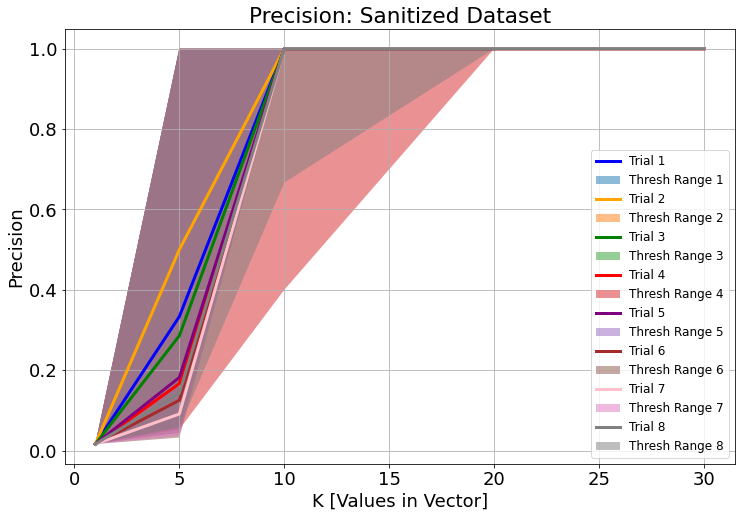

<Figure size 864x576 with 0 Axes>

In [18]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][0], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0], alpha=0.5)

ax.set_title('Precision: Sanitized Dataset')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower right')
ax.grid(visible=True, which='both')

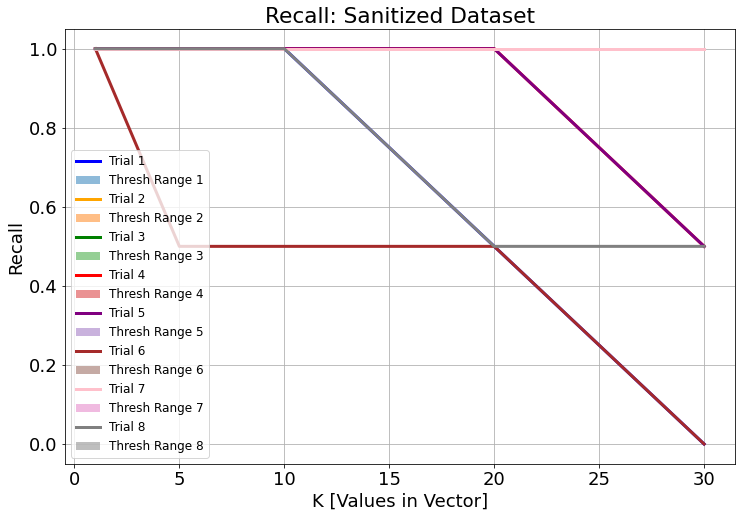

<Figure size 864x576 with 0 Axes>

In [23]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1], alpha=0.5)

ax.set_title('Recall: Sanitized Dataset')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower left')
ax.grid(visible=True, which='both')

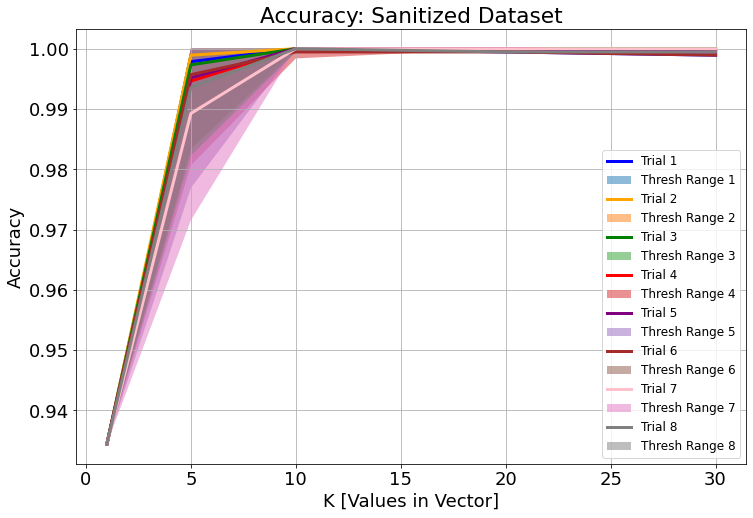

<Figure size 864x576 with 0 Axes>

In [20]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2], alpha=0.5)

ax.set_title('Accuracy: Sanitized Dataset')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Thresh Range 1", "Trial 2", "Thresh Range 2", "Trial 3", "Thresh Range 3", "Trial 4", "Thresh Range 4", "Trial 5", "Thresh Range 5", "Trial 6", "Thresh Range 6", "Trial 7", "Thresh Range 7", "Trial 8", "Thresh Range 8"], loc='lower right')
ax.grid(visible=True, which='both')

In [ ]:
print('Dont run the rest of these, memoization is not yet complete')
raise()

## BlockRR, Memoization

In [ ]:
PM_df = pd.DataFrame()

for key in sanProfilesM.keys():
    for val in sanProfilesM[key]:
        PM_df = PM_df.append(pd.Series([key, val]), ignore_index=True)
PM_df.columns = ['Id', 'FairlyActiveMinutes']

res_PM_df = run_n_attacks(df, PM_df, 8, sample_size=2)

In [ ]:
res_PM_df.fillna(0)
width = 0.8
num_trials = 8
my_xs = [1,5,10,20,30]
ths = [0,2,5]
my_metrics = ['Precision', 'Recall', 'Accuracy']
my_color_scheme =  ['red', 'orange','yellow', 'gold']

results0_list = [[] for ele in range(num_trials)]
results2_list = [[] for ele in range(num_trials)]
results5_list = [[] for ele in range(num_trials)]

for i in range(num_trials):
    temp_df = res_PM_df.loc[res_PM_df['Trial'] == i]
    
    results0_list[i] = [[], [], []] 
    results2_list[i] = [[], [], []] 
    results5_list[i] = [[], [], []]
    
    for m, metric in enumerate(my_metrics):
        for j, th in enumerate(ths):
            given_thresh_df = temp_df.loc[temp_df['Threshold'] == th]
            if th==0:
                results0_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==2:
                results2_list[i][m].extend(list(given_thresh_df[metric]))
            elif th==5: 
                results5_list[i][m].extend(list(given_thresh_df[metric]))

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][0], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][0], results5_list[i][0], alpha=0.5)

ax.set_title('Precision: Sanitized Dataset With Memoization')
ax.set_ylabel('Precision')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][1], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][1], results5_list[i][1], alpha=0.5)

ax.set_title('Recall: Sanitized Dataset With Memoization')
ax.set_ylabel('Recall')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower left')
ax.grid(visible=True, which='both')

In [ ]:
fig, ax = plt.subplots()
plt.figure(figsize=(12,8))
for i in range(num_trials):
    ax.plot(my_xs, results2_list[i][2], linewidth=3, color=my_color_vec[i], label="Trial " + str(i+1))
    
    ax.fill_between(my_xs, results0_list[i][2], results5_list[i][2], alpha=0.5)

ax.set_title('Accuracy: Sanitized Dataset With Memoization')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K [Values in Vector]')
ax.legend(["Trial 1", "Trial 2", "Trial 3", "Trial 4", "Trial 5", "Trial 6", "Trial 7", "Trial 8"], loc='lower right')
ax.grid(visible=True, which='both')